<a href="https://colab.research.google.com/github/VakhromeevaKate/sechenov-ai-methods-course/blob/main/PracticeAIMethods_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Промт-инжиниринг: Mistral, Qwen, DeepSeek, GigaChat, Humata, multillm.ai. chathub.gg

Определение: это процесс создания и оптимизации текстовых запросов (промптов), которые используются для взаимодействия с большими языковыми моделями (LLM) искусственного интеллекта.

Цель промпт-инжиниринга — получить от ИИ-модели максимально точный, релевантный и полезный ответ, понимая её возможности и ограничения. Промпт-инженеры формулируют инструкции и задают вопросы так, чтобы направить модель к выполнению конкретной задачи, будь то генерация текста, написание кода, перевод или что-то ещё.

С чем будем работать на семинаре:
- Mistral (https://chat.mistral.ai/chat?q=),
- Qwen (https://chat.qwen.ai/),
- DeepSeek (https://chat.deepseek.com/),
- GigaChat (https://giga.chat/?error=sso_error),
- Humata (https://www.humata.ai/),
- multillm.ai (https://multillm.ai).
- chathub.gg (https://app.chathub.gg/?utm_source=chathub.gg)

Что GPT-модели умеют:
- искать информацию (поиск)
- обобщать информацию
- генерировать информацию (иозбражения, текст и т п)
- стилизация (в основном, за счет контекста, напеример: ты - школьник 5 класса средней школы. Напиши эссе по теме "Как я провел лето в деревне у бабушки")

Структура промпта:
Контекст: ты - учитель, ребенок, профессионал в какой-то области...
Задача: напиши текст, сгенерируй изображение, напиши код на языке lisp...
Формат ответа: в виде таблицы, текста, списка... или пример того, как должен выглядеть ответ.

Задача для GPT должна быть сформулирована полностью и ясно.

Поисковые промпты могут выглядеть просто как вопрос - сколько спутников у Сатурна? Кто автор Тихий Дон? и т п



### Что такое галлюцинации в LLM?

**Галлюцинации ИИ** — это явление, при котором большая языковая модель (LLM) генерирует информацию, которая является:

1.  **Неверной** или **искаженной**: Модель утверждает факты, не соответствующие действительности (например, неправильные даты, имена, события).
2.  **Несуществующей** или **выдуманной**: Модель полностью сочиняет информацию, включая несуществующие книги, статьи, законы, исторические события или даже цитаты.
3.  **Не относящейся к контексту** или **бессмысленной**: Ответ формально правильный, но не имеет отношения к заданному вопросу или является абсурдным в данном контексте.

Проще говоря, **это когда модель с абсолютной уверенностью говорит неправду**.

**Примеры галлюцинаций:**

*   **Фактическая ошибка:** "Барак Обама был президентом США в 2005 году." (На самом деле он вступил в должность в 2009).
*   **Вымысел:** "В своей нобелевской речи Альберт Эйнштейн сказал: 'Воображение важнее знаний, но знания указывают дорогу'." (Эйнштейн никогда не получал Нобелевскую премию за теорию относительности, а его известная фраза звучит иначе).
*   **"Галлюцинация" источников:** Модель может приписать реальной статье несуществующие данные или сослаться на научную работу, которой не существует, но с убедительным названием и якобы реальными авторами.

---

### Почему они возникают?

Галлюцинации — это не "баг" или ошибка в коде, а фундаментальное следствие того, **как работают LLM**. Это системная особенность их архитектуры.

Вот основные причины:

#### 1. Статистическое прогнозирование, а не поиск истины
**Самая главная причина.** LLM не "думают" и не "понимают" мир как люди. Они — сложнейшие системы **статистического прогнозирования**. Их задача — предугадать следующее самое вероятное слово (токен) в последовательности на основе огромного массива данных, на которых они обучались.

Они оптимизированы для создания **правдоподобного и грамматически корректного текста**, а не для проверки фактов. Модель выбирает слово, которое *статистически чаще всего* встречалось в похожем контексте в её обучающих данных, даже если это приводит к factual ошибке.

#### 2. Ограничения обучающих данных
*   **Неполнота данных:** Модель обучается на срезах интернета, который полон неточностей, мифов, устаревшей информации и откровенной лжи. Модель усваивает всё это без разбора.
*   **Противоречия в данных:** В данных могут содержаться противоположные утверждения по одному и тому же вопросу. Модель может "выбрать" не то, которое является истинным, а то, которое статистически более вероятно в контексте запроса.

#### 3. Отсутствие модели мира
У LLM нет внутренней модели реального мира, основанной на причинно-следственных связях и опыте. Они не могут отличить возможное от невозможного, если оба варианта часто встречаются в текстах. Они не "знают", что человек не может присутствовать на двух континентах одновременно, если в данных много примеров художественной литературы, где такое происходит.

#### 4. Чрезмерная уверенность и "угодливость" (SycoPhancy)
LLM часто разрабатываются и настраиваются (через RLHF — обучение с подкреплением на основе человеческих предпочтений) для того, чтобы давать уверенные, прямые и полезные ответы. Это может заставить модель **придумать ответ**, если она "считает", что так будет лучше соответствовать запросу пользователя, даже если у неё нет точной информации. Она скорее сочинит что-то правдоподобное, чем скажет "я не знаю".

#### 5. Чувствительность к формулировкам (Prompt Sensitivity)
Один и тот же вопрос, заданный разными словами, может привести к совершенно разным ответам — как правильным, так и галлюцинированным. Неудачно составленный промт (запрос) может легко направить модель по ложному пути.

### Что с этим делают?

С галлюцинациями активно борются, но полностью искоренить их пока невозможно. Основные методы:

1.  **Поиск по внешним базам знаний (RAG — Retrieval-Augmented Generation):** Это самый эффективный на сегодня подход. Прежде чем генерировать ответ, модель *ищет информацию в надёжных внешних источниках* (базы данных, свежие статьи, официальные сайты) и использует эти актуальные данные для формирования ответа. Это сильно снижает количество вымысла.
2.  **Тонкая настройка и обучение с подкреплением (RLHF):** Моделей дополнительно обучают на наборах данных, где помечены правильные и неправильные ответы, поощряя их быть более точными и осторожными.
3.  **Промт-инжиниринг:** Правильная формулировка запросов, например, добавление инструкций: "Если ты не уверен, скажи 'я не знаю'", или "Ответь строго на основе приведённого ниже текста".
4.  **Прозрачность:** Ответы моделей всё чаще снабжаются ссылками на источники, чтобы пользователь мог проверить информацию.

### Вывод

**Галлюцинации — это неизбежный побочный продукт статистической природы языковых моделей.** Они возникают потому, что модель создаёт текст, а не извлекает факты. Поэтому **критическое мышление и проверка информации из авторитетных источников остаются абсолютно необходимыми** при использовании любого ИИ-ассистента. Всегда воспринимайте их ответ как *правдоподобный черновик*, а не как истину в последней инстанции.


Практика:
- Пишем промпт-вопрос
- улучшаем до более точного результата

Задание:
- Взять 5 нейросетей (можно из списка, можно свои)
- Сгенерировать с их помощью код на python, который выводит с помощью matplotlib любую картинку
- запустить код
- прислать полученные результаты и свой вывод (какая для каких задач лучше)

Пример промпта, на который нейросеть нагенерировала код:
Сгенерируй код на python, который выводит с помощью matplotlib картинку Моны Лизы

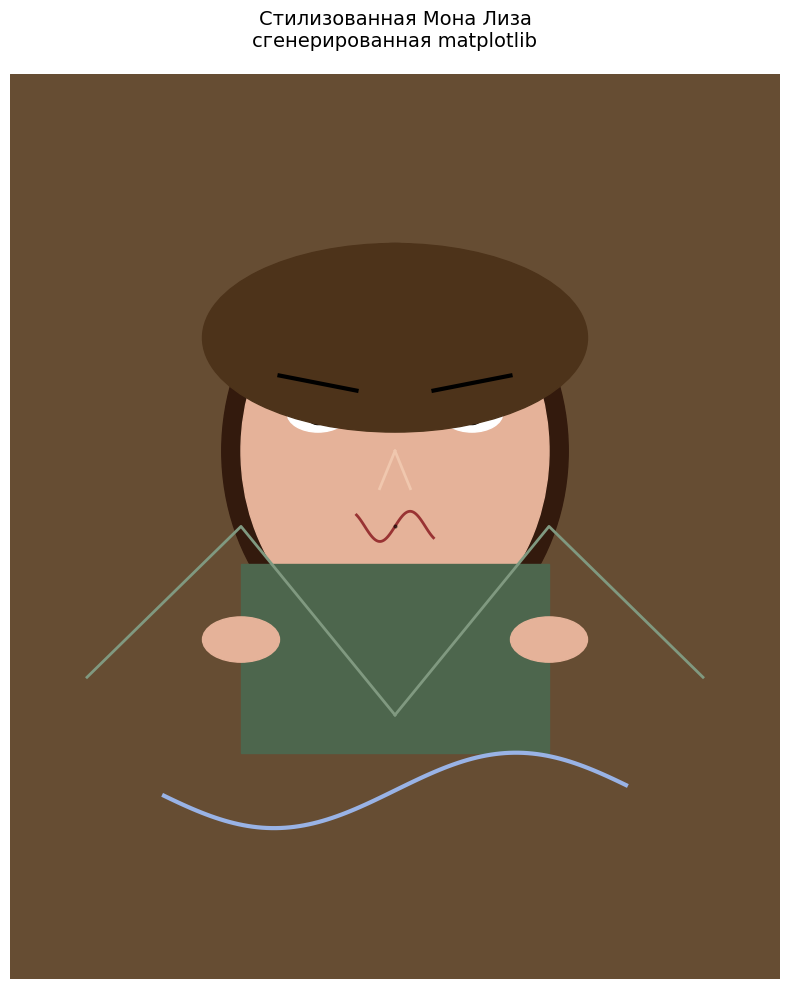

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse
from matplotlib.colors import LinearSegmentedColormap

def create_mona_lisa():
    fig, ax = plt.subplots(figsize=(8, 10))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 120)
    ax.axis('off')

    # Создаем собственный цветовой градиент для кожи
    skin_colors = [(1.0, 0.9, 0.8), (0.9, 0.7, 0.6), (0.8, 0.6, 0.5)]
    skin_cmap = LinearSegmentedColormap.from_list('skin_cmap', skin_colors)

    # Фон
    bg = Rectangle((0, 0), 100, 120, color=(0.4, 0.3, 0.2))
    ax.add_patch(bg)

    # Лицо (овал)
    face = Ellipse((50, 70), 40, 50, color=skin_cmap(0.5))
    ax.add_patch(face)

    # Волосы
    hair = Ellipse((50, 70), 45, 55, color=(0.2, 0.1, 0.05))
    ax.add_patch(hair)
    face = Ellipse((50, 70), 40, 50, color=skin_cmap(0.5))
    ax.add_patch(face)

    # Глаза
    left_eye = Ellipse((40, 75), 8, 5, color='white')
    right_eye = Ellipse((60, 75), 8, 5, color='white')
    ax.add_patch(left_eye)
    ax.add_patch(right_eye)

    # Зрачки
    left_pupil = Ellipse((40, 75), 3, 3, color='black')
    right_pupil = Ellipse((60, 75), 3, 3, color='black')
    ax.add_patch(left_pupil)
    ax.add_patch(right_pupil)

    # Брови
    ax.plot([35, 45], [80, 78], color='black', linewidth=3)
    ax.plot([55, 65], [78, 80], color='black', linewidth=3)

    # Нос
    ax.plot([50, 48], [70, 65], color=skin_cmap(0.3), linewidth=2)
    ax.plot([50, 52], [70, 65], color=skin_cmap(0.3), linewidth=2)

    # Рот (знаменитая улыбка)
    x = np.linspace(45, 55, 100)
    y = 60 + 2 * np.sin((x - 50) * 0.8)
    ax.plot(x, y, color=(0.6, 0.2, 0.2), linewidth=2)

    # Платок на голову
    headscarf = Ellipse((50, 85), 50, 25, color=(0.3, 0.2, 0.1))
    ax.add_patch(headscarf)

    # Платье
    dress = Rectangle((30, 30), 40, 25, color=(0.3, 0.4, 0.3))
    ax.add_patch(dress)

    # Руки
    left_hand = Ellipse((30, 45), 10, 6, color=skin_cmap(0.5))
    right_hand = Ellipse((70, 45), 10, 6, color=skin_cmap(0.5))
    ax.add_patch(left_hand)
    ax.add_patch(right_hand)

    # Знаменитый пейзаж на заднем плане
    # Горы
    ax.plot([10, 30, 50], [40, 60, 35], color=(0.5, 0.6, 0.5), linewidth=2)
    ax.plot([50, 70, 90], [35, 60, 40], color=(0.5, 0.6, 0.5), linewidth=2)

    # Дорожка/река
    x_river = np.linspace(20, 80, 100)
    y_river = 25 + 5 * np.sin((x_river - 50) * 0.1)
    ax.plot(x_river, y_river, color=(0.6, 0.7, 0.9), linewidth=3)

    # Добавляем загадочную улыбку точками
    ax.plot(50, 60, 'o', color='black', markersize=2, alpha=0.5)

    plt.title('Стилизованная Мона Лиза\nсгенерированная matplotlib',
              fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

create_mona_lisa()

Сгенерируй код на python, который выводит с помощью matplotlib на графике изображение со слебующего uri: https://www.google.com/url?sa=i&url=https%3A%2F%2Fru.wikipedia.org%2Fwiki%2F%25D0%259C%25D0%25BE%25D0%25BD%25D0%25B0_%25D0%259B%25D0%25B8%25D0%25B7%25D0%25B0&psig=AOvVaw3FSSGhmME4TMb5g7n-Q8DF&ust=1758282706509000&source=images&cd=vfe&opi=89978449&ved=0CBUQjRxqFwoTCMDPnNif4o8DFQAAAAAdAAAAABAE

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import urllib.request

def show_image_from_url():
    # Прямая ссылка на изображение (замените на актуальную)
    # ВАЖНО: Используйте прямые ссылки на изображения, а не на страницы
    image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg"

    try:
        # Загрузка изображения через requests
        #response = requests.get(image_url)
        #img = Image.open(BytesIO(response.content))

        # Или альтернативный способ с urllib
        with urllib.request.urlopen(image_url) as url:
          img = Image.open(url)

        # Конвертация в numpy array
        img_array = np.array(img)

        # Отображение
        fig, ax = plt.subplots(figsize=(10, 12))
        ax.imshow(img_array)
        ax.axis('off')
        ax.set_title('Мона Лиза - Леонардо да Винчи\n(Загружено с Wikimedia Commons)',
                    fontsize=14, pad=20)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        print("Возможные причины:")
        print("1. Нет подключения к интернету")
        print("2. URL недоступен")
        print("3. Проблемы с библиотеками")

# Запуск функции
show_image_from_url()

Ошибка при загрузке изображения: cannot identify image file <_io.BytesIO object at 0x7cad143f1990>
Возможные причины:
1. Нет подключения к интернету
2. URL недоступен
3. Проблемы с библиотеками
